In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from labellines import labelLine, labelLines

In [5]:
data_N200M30 = pd.read_csv('./raw_data/NIFTY200Momentum30.csv')[::-1]
data_N50 = pd.read_csv('./raw_data/NIFTY50.csv')[::-1]
data_NN50 = pd.read_csv('./raw_data/NIFTY_NEXT50.csv')[::-1]
data_ALowVol = pd.read_csv('./raw_data/NIFTY_ALPHALOWVOL.csv')[::-1]
data_M150Q50 = pd.read_csv('./raw_data/NIFTY_MIDCAP150_QUALITY50.csv')[::-1]
data_N100LowVol30 = pd.read_csv('./raw_data/NIFTY100_LOWVOL30.csv')[::-1]

In [6]:
# Factor indices start at 1000 on 1-Apr-2005
# We convert N50 & NN50 series to start from base of 1000 on 1-Apr-2005 to be comparable on the same chart

data_N50.at[len(data_N50)-1, 'NEW_BASE'] = 1000
data_NN50.at[len(data_NN50)-1, 'NEW_BASE'] = 1000

data_N50['pct_change'] = data_N50.Close.pct_change()
data_NN50['pct_change'] = data_NN50.Close.pct_change()

for i in reversed(range(0, len(data_N50)-1)):
    data_N50.loc[i, 'NEW_BASE'] = data_N50.loc[i+1, 'NEW_BASE'] * (1 + data_N50.loc[i, 'pct_change'])

for j in reversed(range(0, len(data_NN50)-1)):
    data_NN50.loc[j, 'NEW_BASE'] = data_NN50.loc[j+1, 'NEW_BASE'] * (1 + data_NN50.loc[j, 'pct_change'])

In [22]:
def plot_rolling_returns(years):
    days = 248  # avg. # of trading days in a year

    data_N200M30['NIFTY200Momentum30'] = data_N200M30.Close.rolling(days * years).mean()  
    data_N50['NIFTY50'] = data_N50.NEW_BASE.rolling(days * years).mean()  
    data_NN50['NIFTY_NEXT50'] = data_NN50.NEW_BASE.rolling(days * years).mean()  
    data_ALowVol['NIFTY_ALPHALOWVOL'] = data_ALowVol.Close.rolling(days * years).mean()  
    data_M150Q50['NIFTY_MIDCAP150_QUALITY50'] = data_M150Q50.Close.rolling(days * years).mean()  
    data_N100LowVol30['NIFTY100_LOWVOL30'] = data_N100LowVol30.Close.rolling(days * years).mean()  

    ax = data_N200M30.plot.line(x='Date', y='NIFTY200Momentum30', figsize=(25,15))
    data_N50.plot.line(x='Date', y='NIFTY50', ax=ax)
    data_NN50.plot.line(x='Date', y='NIFTY_NEXT50', ax=ax)
    data_ALowVol.plot.line(x='Date', y='NIFTY_ALPHALOWVOL', ax=ax)
    data_M150Q50.plot.line(x='Date', y='NIFTY_MIDCAP150_QUALITY50', ax=ax)
    data_N100LowVol30.plot.line(x='Date', y='NIFTY100_LOWVOL30', ax=ax)
    ax.labelsize = 'large'
    
    labelLines(plt.gca().get_lines(), zorder=5.5)

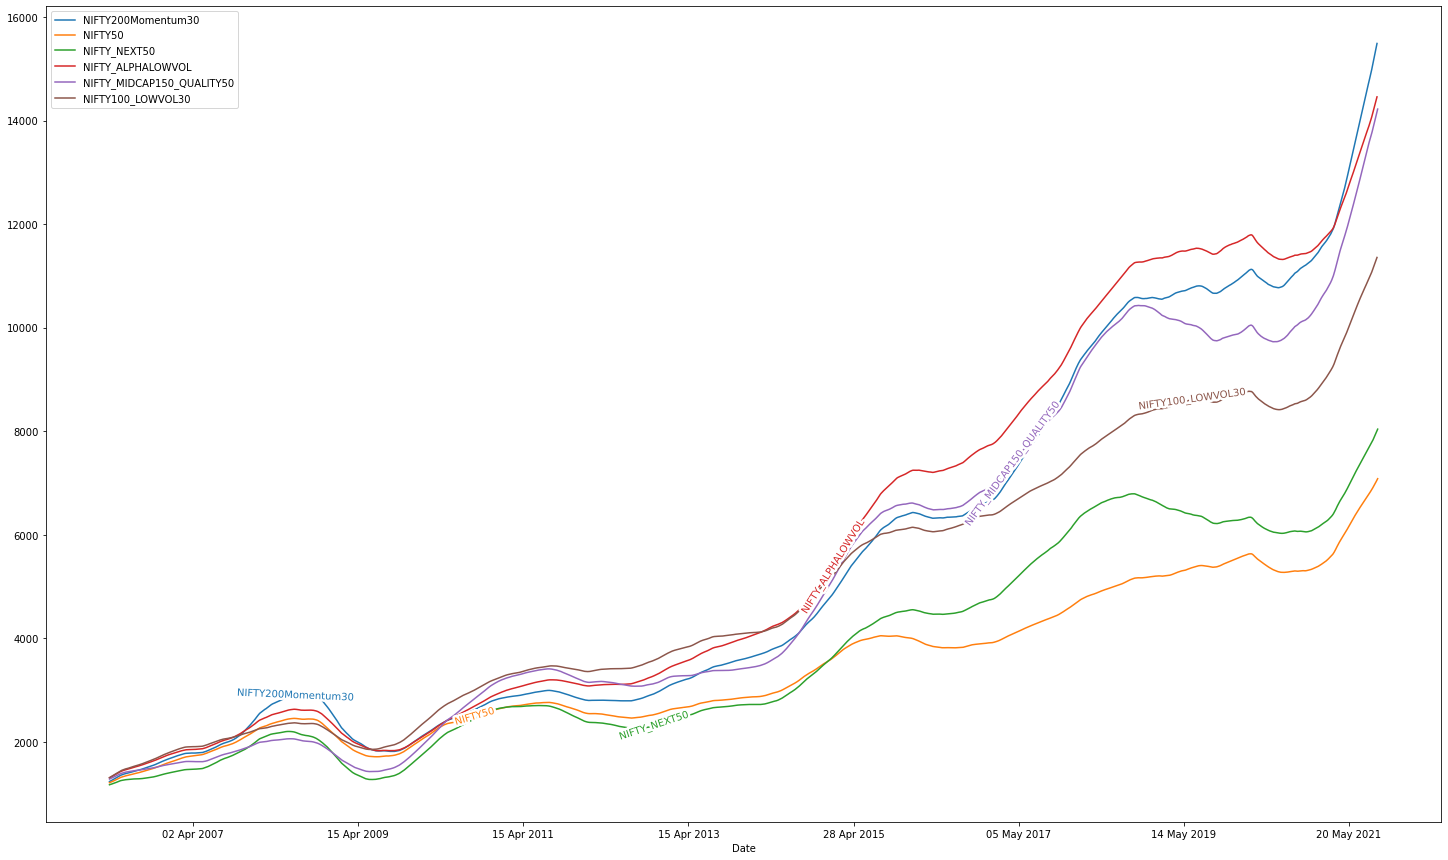

In [24]:
plot_rolling_returns(years=1)

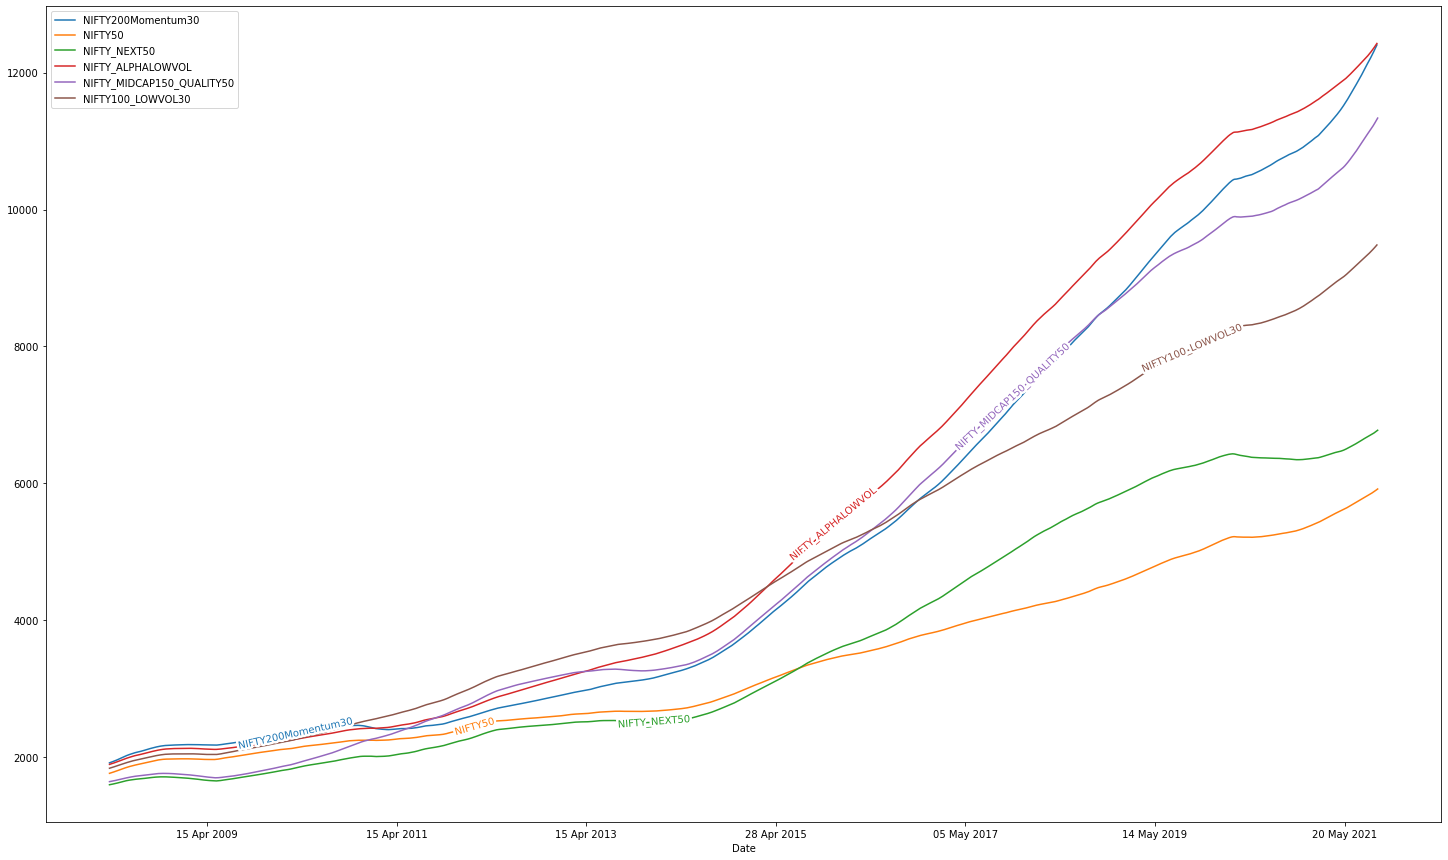

In [25]:
plot_rolling_returns(years=3)

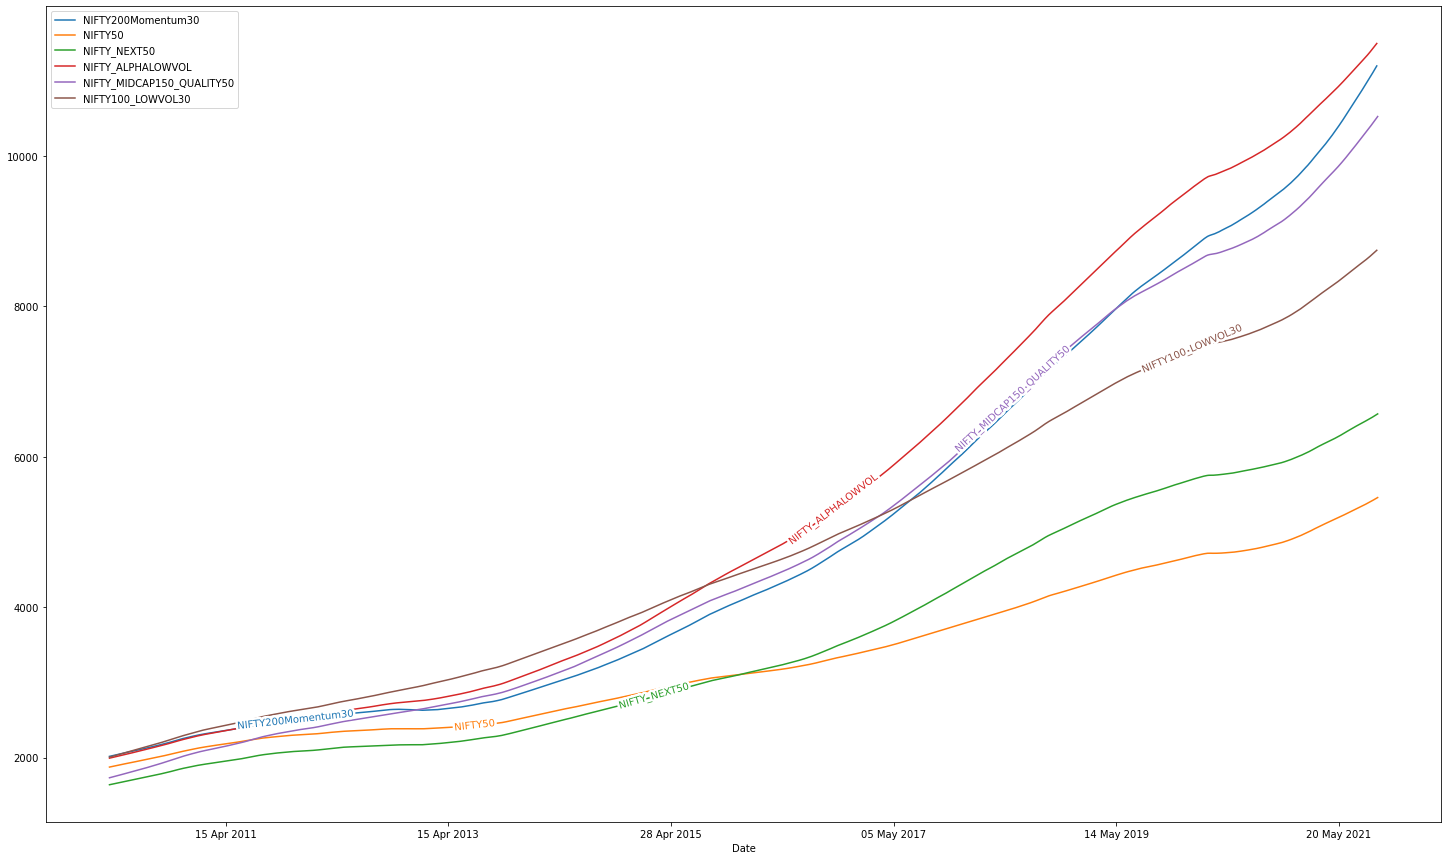

In [26]:
plot_rolling_returns(years=5)

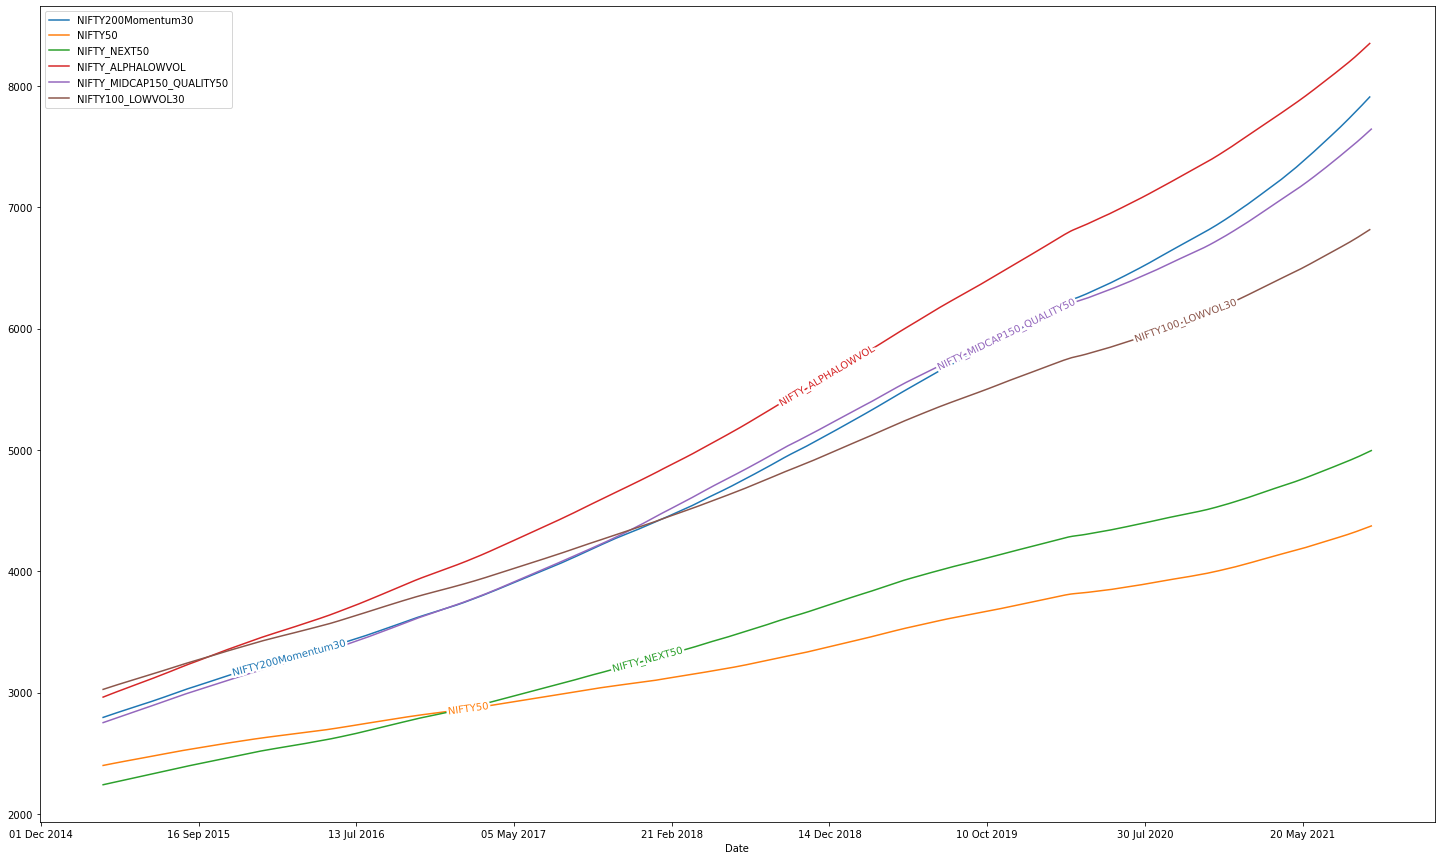

In [27]:
plot_rolling_returns(years=10)